# Bank Personal Loan Acceptance

## Introduction
#### Problem Statement
A lot of banks seeks to enhance the efficiency and success of its personal loan marketing campaigns by developing a predictive model capable of identifying customers most likely to accept a personal loan offer. Leveraging a comprehensive dataset encompassing over 5,000 customers, this project aims to utilize customer demographics, financial behaviors, and banking engagement indicators to categorize customers into 'Loan Acceptance' or 'Loan Rejection' segments.

#### Objective
The project aims to deliver actionable insights for the bank's:
- marketing team
- streamlining campaign targeting
- reducing marketing costs
- increasing the conversion rate of loan offers. 

By identifying key factors that drive loan acceptance, the project will enable the bank to optimize its resources and provide a more personalized customer experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LinearRegression #machine learning
from sklearn.metrics import mean_squared_error #model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree
import matplotlib.pyplot as plt
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Gathering and Preparation

#### Sources of Data

This dataset contains the information of more than 5000 customers, based on the points that each customer has earned, a loan is offered to them. The features are:
- Age: Customer's age in completed years
- Experience: Years of professional experience
- Income: Annual income of the customer
- Zip code: home address Zip code (dont want)
- Family: Family size of customer
- CCAvg: Spending on credit cards per month
- Education: Education level (Undergraduate=1, Graduate= 2, Advanced=3)
- Mortgage: Value of house mortgage if any
- Personal_loan: Did this customer accept the personal loan offered in the last campaign?
- Security_account: Does the customer have a securities account with this bank?
- Cd_account: Does the customer have a certificate of deposit (CD) account with this bank?
- Online: Does the customer use internet banking facilities?
- Creditcard: Does the customer use a credit card issued by Universal Bank?


In [2]:
personalloan=pd.read_csv("Bank_Personal_Loan.csv",sep=',' )

In [3]:
personalloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
personalloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
personalloan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
personalloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [7]:
personalloan['CCAvg'].unique()

array(['1/60', '1/50', '1/00', '2/70', '0/40', '0/30', '0/60', '8/90',
       '2/40', '0/10', '3/80', '2/50', '2/00', '4/70', '8/10', '0/50',
       '0/90', '1/20', '0/70', '3/90', '0/20', '2/20', '3/30', '1/80',
       '2/90', '1/40', '5/00', '2/30', '1/10', '5/70', '4/50', '2/10',
       '8/00', '1/70', '0/00', '2/80', '3/50', '4/00', '2/60', '1/30',
       '5/60', '5/20', '3/00', '4/60', '3/60', '7/20', '1/75', '7/40',
       '2/67', '7/50', '6/50', '7/80', '7/90', '4/10', '1/90', '4/30',
       '6/80', '5/10', '3/10', '0/80', '3/70', '6/20', '0/75', '2/33',
       '4/90', '0/67', '3/20', '5/50', '6/90', '4/33', '7/30', '4/20',
       '4/40', '6/10', '6/33', '6/60', '5/30', '3/40', '7/00', '6/30',
       '8/30', '6/00', '1/67', '8/60', '7/60', '6/40', '10/00', '5/90',
       '5/40', '8/80', '1/33', '9/00', '6/70', '4/25', '6/67', '5/80',
       '4/80', '3/25', '5/67', '8/50', '4/75', '4/67', '3/67', '8/20',
       '3/33', '5/33', '9/30', '2/75'], dtype=object)

#### Data wrangling

In [8]:
personalloan['CCAvg'] = personalloan['CCAvg'].str.replace('/','.').astype('float')

In [9]:
personalloan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
personalloan.drop(['ID', 'ZIP Code'], axis=1 , inplace = True)

In [11]:
personalloan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [12]:
personalloan[personalloan['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [13]:
personalloan['Experience']= abs(personalloan['Experience'])

In [14]:
personalloan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Exploratory Data Analysis (EDA)

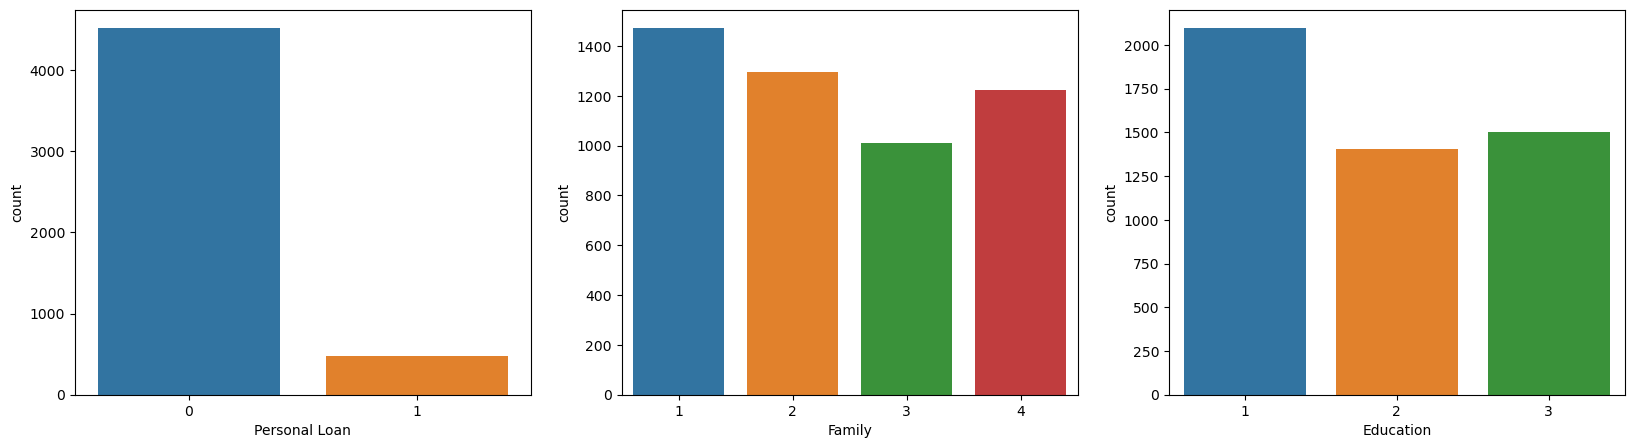

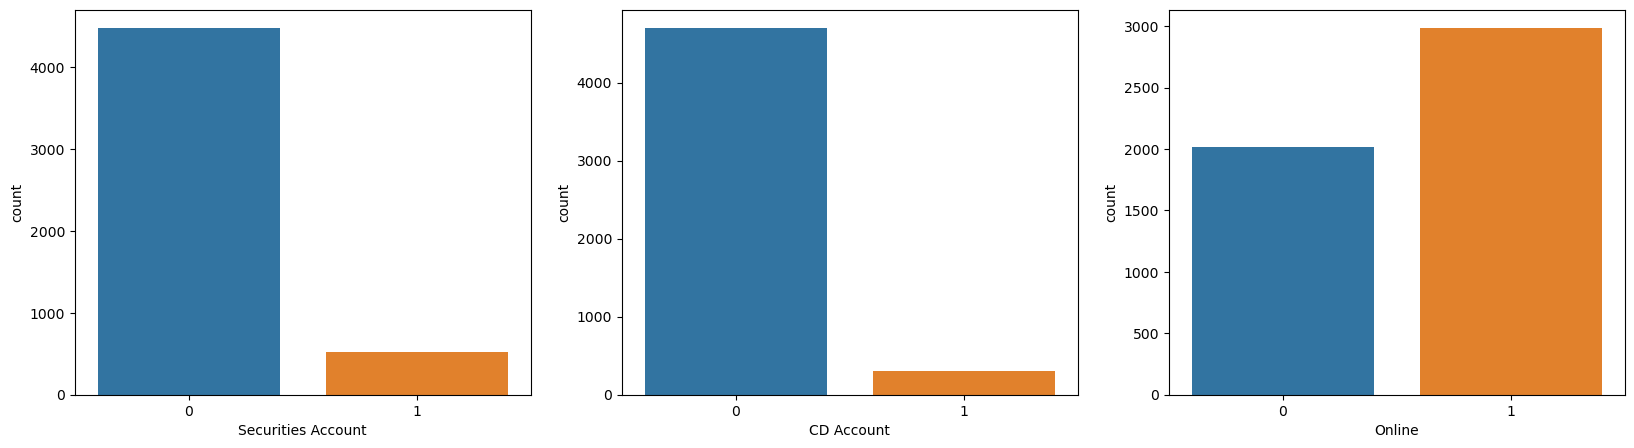

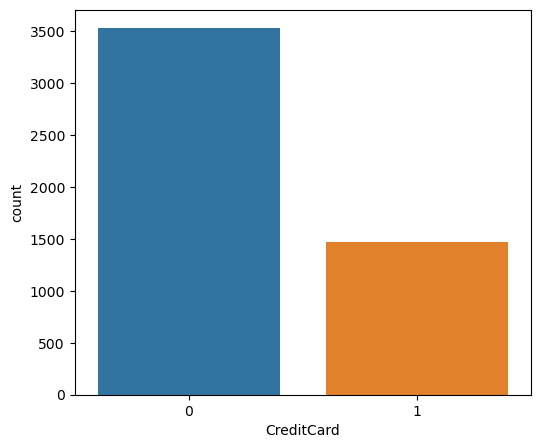

In [15]:
Categorical = ['Personal Loan', 'Family','Education', 'Securities Account','CD Account', 'Online', 'CreditCard']
i=0
while i<8:
    
    fig = plt.figure(figsize=(20,5))  
    plt.subplot(1,3,1)
    sns.countplot(x=Categorical[i], data=personalloan)
    i+=1
    if i ==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=Categorical[i], data=personalloan)
    i+=1
     
    plt.subplot(1,3,3)
    sns.countplot(x=Categorical[i], data=personalloan)
    i+=1
    plt.show()

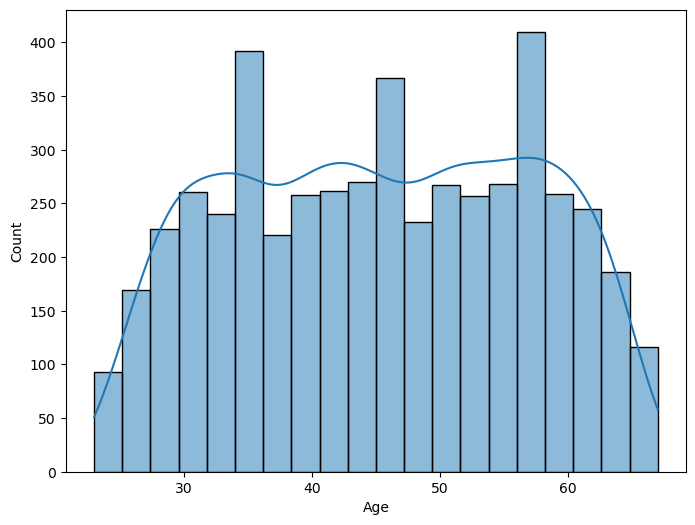

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(personalloan['Age'], bins=20, kde=True)
plt.show()

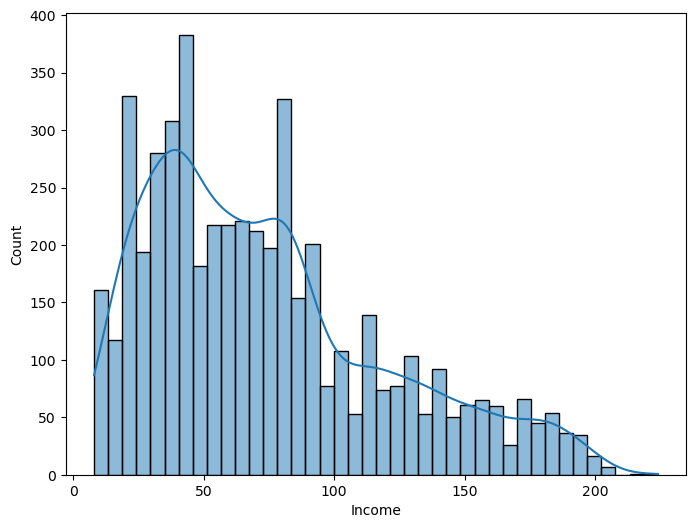

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(personalloan['Income'], bins=40, kde=True)
plt.show()

In [18]:
personalloan['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

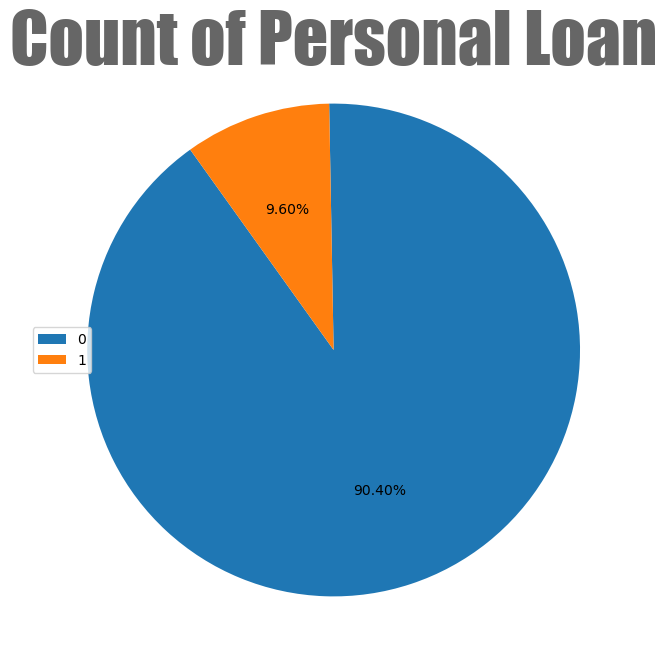

In [19]:
size =personalloan['Personal Loan'].value_counts().values/10 #List for take sizes
lbl=personalloan['Personal Loan'].value_counts().index
plt.figure(figsize=(10,8)) #Size of plot
plt.title('Count of Personal Loan',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #Help for plot
plt.show()

In [20]:
personalloan['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

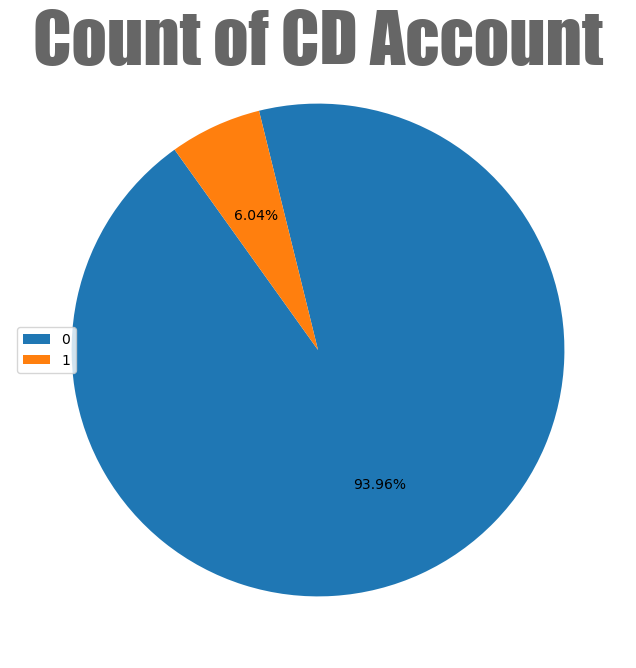

In [21]:
size =personalloan['CD Account'].value_counts().values/10 #List for take sizes
lbl=personalloan['CD Account'].value_counts().index
plt.figure(figsize=(10,8)) #Size of plot
plt.title('Count of CD Account',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #Help for plot
plt.show()

In [22]:
personalloan['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

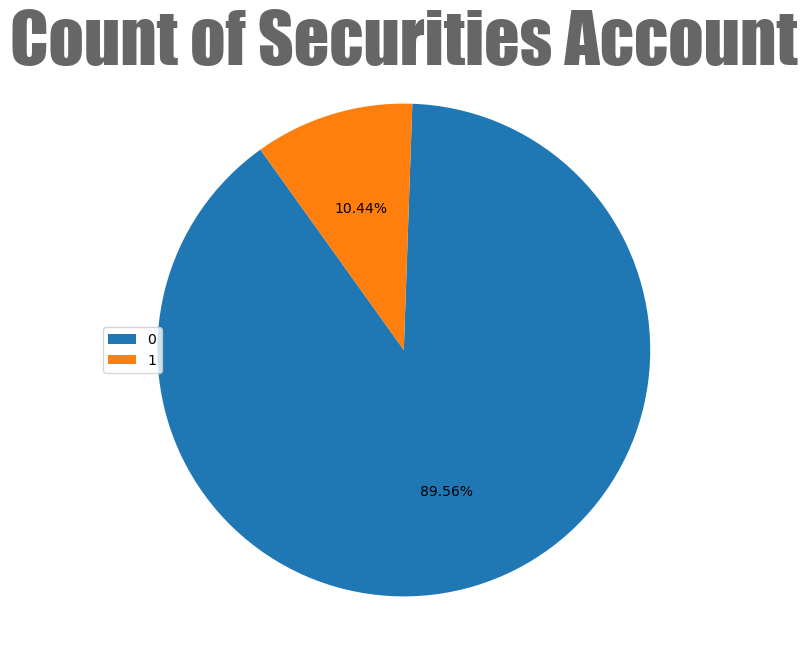

In [23]:
size =personalloan['Securities Account'].value_counts().values/10 #List for take sizes
lbl=personalloan['Securities Account'].value_counts().index
plt.figure(figsize=(10,8)) #Size of plot
plt.title('Count of Securities Account',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Title
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #Help for plot
plt.show()

Number of people with zero mortgage.

In [24]:
personalloan[personalloan['Mortgage']==0]['Mortgage'].value_counts()

0    3462
Name: Mortgage, dtype: int64

Number of people with zero CCAvg.

In [25]:
personalloan[personalloan['CCAvg']==0]['CCAvg'].value_counts()

0.0    106
Name: CCAvg, dtype: int64

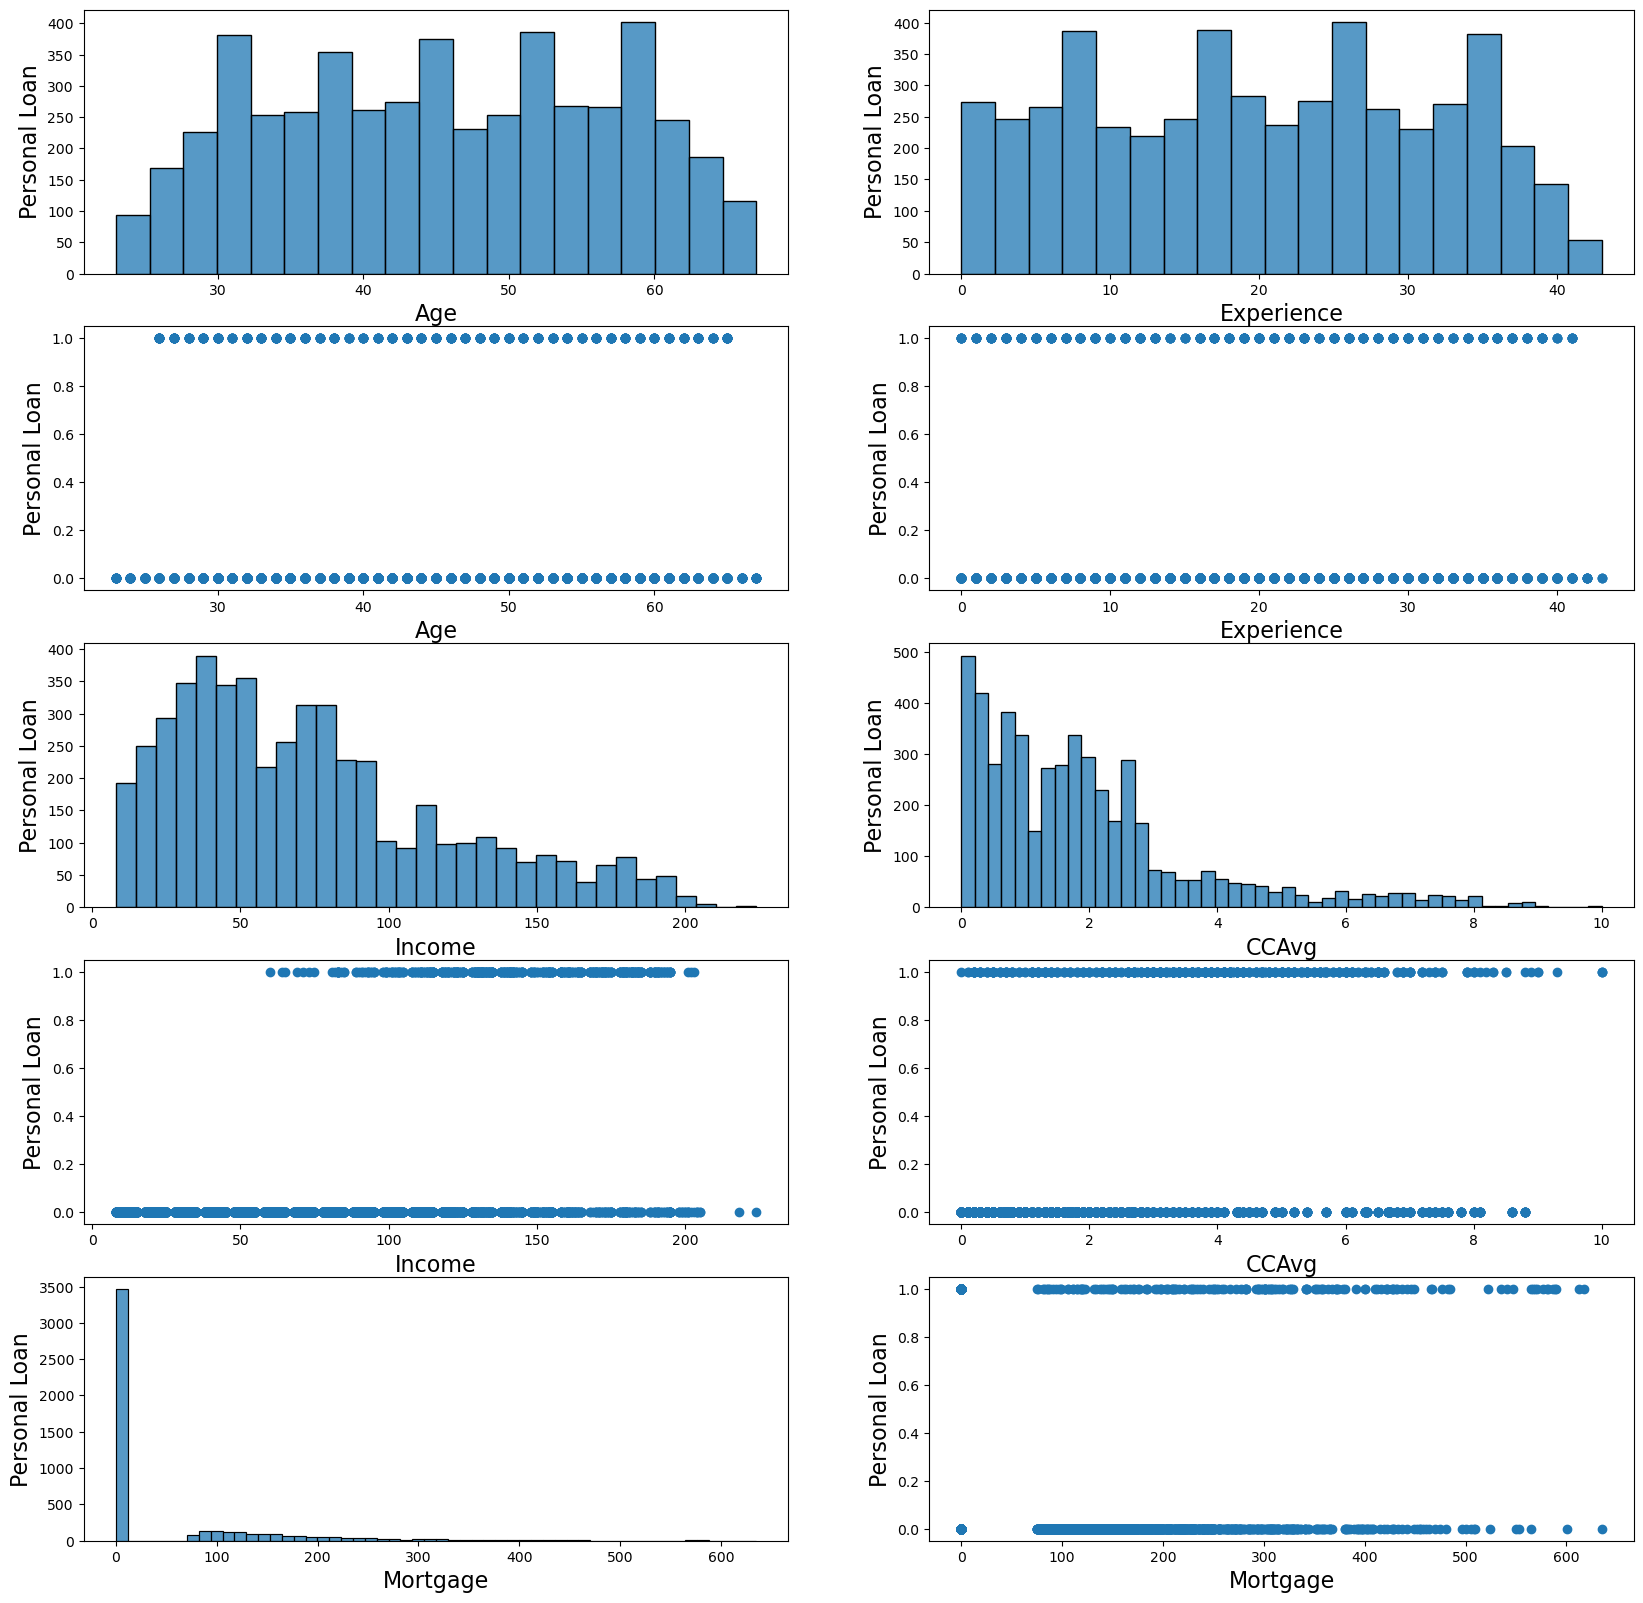

In [26]:
plt.figure(figsize=(20,24))

plt.subplot(6,2,1)
sns.histplot(personalloan.Age)
plt.xlabel( 'Age', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,2)
sns.histplot(personalloan.Experience)
plt.xlabel( 'Experience', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)



plt.subplot(6,2,3)
plt.scatter(personalloan.Age, personalloan['Personal Loan'])
plt.xlabel( 'Age', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,4)
plt.scatter(personalloan.Experience, personalloan['Personal Loan'])
plt.xlabel( 'Experience', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,5)
sns.histplot(personalloan.Income)
plt.xlabel( 'Income', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,6)
sns.histplot(personalloan.CCAvg)
plt.xlabel( 'CCAvg', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)


plt.subplot(6,2,7)
plt.scatter(personalloan.Income, personalloan['Personal Loan'])
plt.xlabel( 'Income', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,8)
plt.scatter(personalloan.CCAvg, personalloan['Personal Loan'])
plt.xlabel( 'CCAvg', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,9)
sns.histplot(personalloan.Mortgage)
plt.xlabel( 'Mortgage', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.subplot(6,2,10)
plt.scatter(personalloan.Mortgage, personalloan['Personal Loan'])
plt.xlabel( 'Mortgage', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=16)

plt.show()

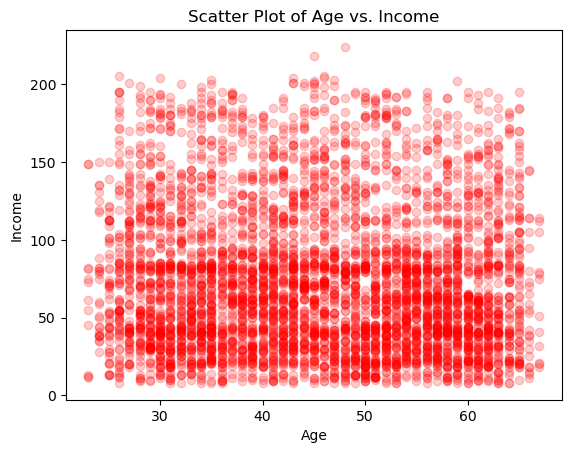

In [28]:
plt.plot(personalloan['Age'], personalloan['Income'], 'o', color='r', alpha=0.2)

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')

plt.show()

Do younger customers have more income than older customers?

In [29]:
personalloan.groupby(['Family','Personal Loan'])['Personal Loan'].count()

Family  Personal Loan
1       0                1365
        1                 107
2       0                1190
        1                 106
3       0                 877
        1                 133
4       0                1088
        1                 134
Name: Personal Loan, dtype: int64

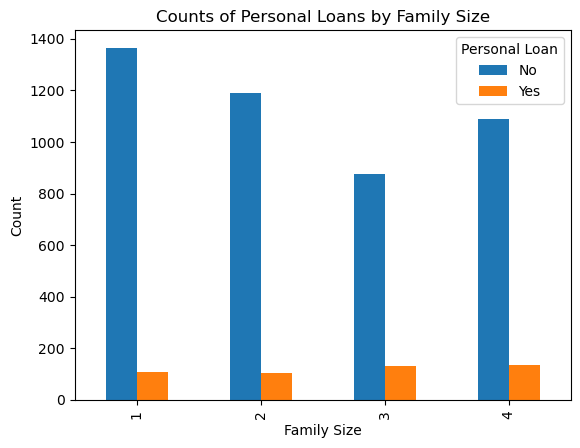

In [31]:
# Assuming 'personalloan' is your DataFrame
data = personalloan.groupby(['Family', 'Personal Loan'])['Personal Loan'].count().unstack()

# Create a side-by-side bar plot
data.plot(kind='bar', stacked=False)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Counts of Personal Loans by Family Size')
plt.legend(title='Personal Loan', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [32]:
personalloan.groupby(['Education','Personal Loan'])['Personal Loan'].count()

Education  Personal Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: Personal Loan, dtype: int64

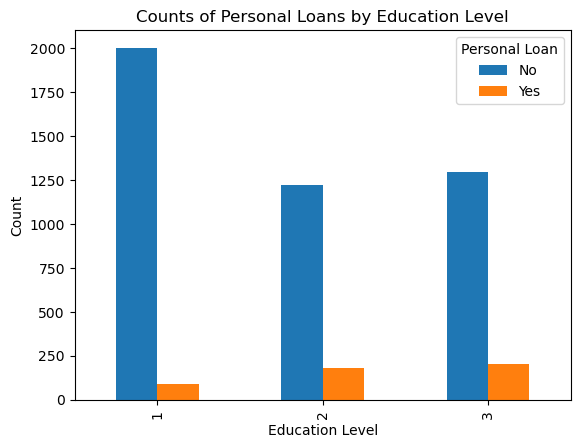

In [33]:
data = personalloan.groupby(['Education', 'Personal Loan'])['Personal Loan'].count().unstack()

# Create a grouped bar plot
data.plot(kind='bar', stacked=False)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Counts of Personal Loans by Education Level')
plt.legend(title='Personal Loan', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [34]:
personalloan.groupby(['Securities Account','Personal Loan'])['Personal Loan'].count()

Securities Account  Personal Loan
0                   0                4058
                    1                 420
1                   0                 462
                    1                  60
Name: Personal Loan, dtype: int64

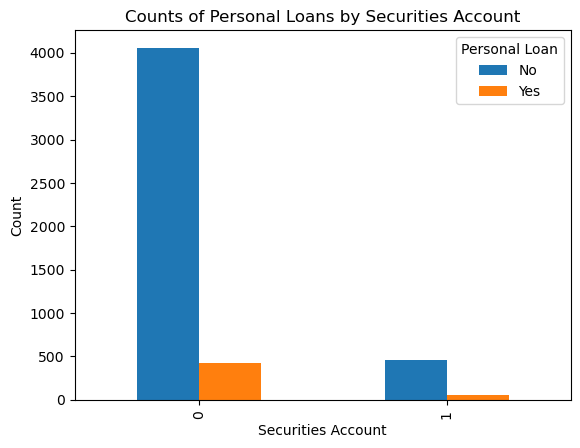

In [35]:
data = personalloan.groupby(['Securities Account', 'Personal Loan'])['Personal Loan'].count().unstack()

# Create a grouped bar plot
data.plot(kind='bar', stacked=False)
plt.xlabel('Securities Account')
plt.ylabel('Count')
plt.title('Counts of Personal Loans by Securities Account')
plt.legend(title='Personal Loan', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [36]:
personalloan.groupby(['CD Account','Personal Loan'])['Personal Loan'].count()

CD Account  Personal Loan
0           0                4358
            1                 340
1           0                 162
            1                 140
Name: Personal Loan, dtype: int64

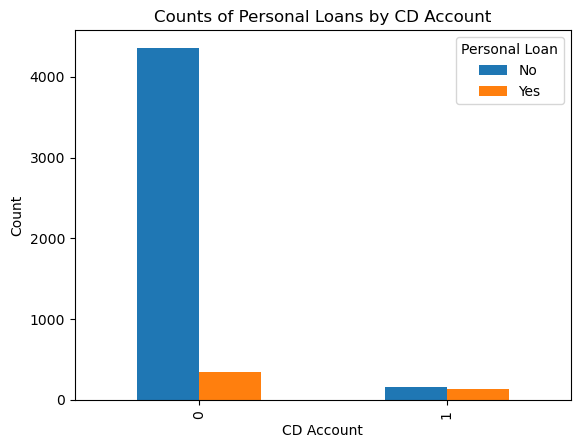

In [37]:
data = personalloan.groupby(['CD Account', 'Personal Loan'])['Personal Loan'].count().unstack()

# Create a grouped bar plot
data.plot(kind='bar', stacked=False)
plt.xlabel('CD Account')
plt.ylabel('Count')
plt.title('Counts of Personal Loans by CD Account')
plt.legend(title='Personal Loan', labels=['No', 'Yes'], loc='upper right')
plt.show()

In [38]:
personalloan.groupby(['CreditCard','Personal Loan'])['Personal Loan'].count()

CreditCard  Personal Loan
0           0                3193
            1                 337
1           0                1327
            1                 143
Name: Personal Loan, dtype: int64

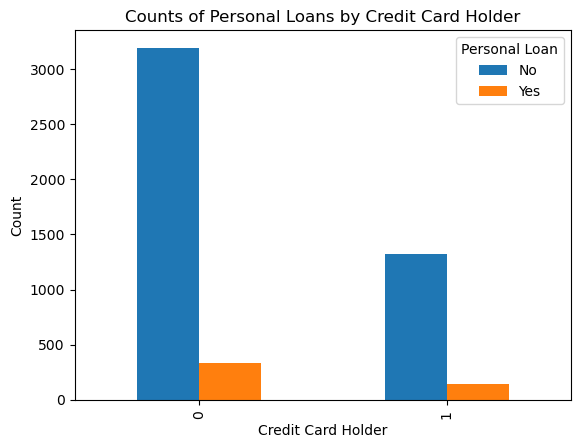

In [39]:
data = personalloan.groupby(['CreditCard', 'Personal Loan'])['Personal Loan'].count().unstack()

# Create a grouped bar plot
data.plot(kind='bar', stacked=False)
plt.xlabel('Credit Card Holder')
plt.ylabel('Count')
plt.title('Counts of Personal Loans by Credit Card Holder')
plt.legend(title='Personal Loan', labels=['No', 'Yes'], loc='upper right')
plt.show()

<Axes: >

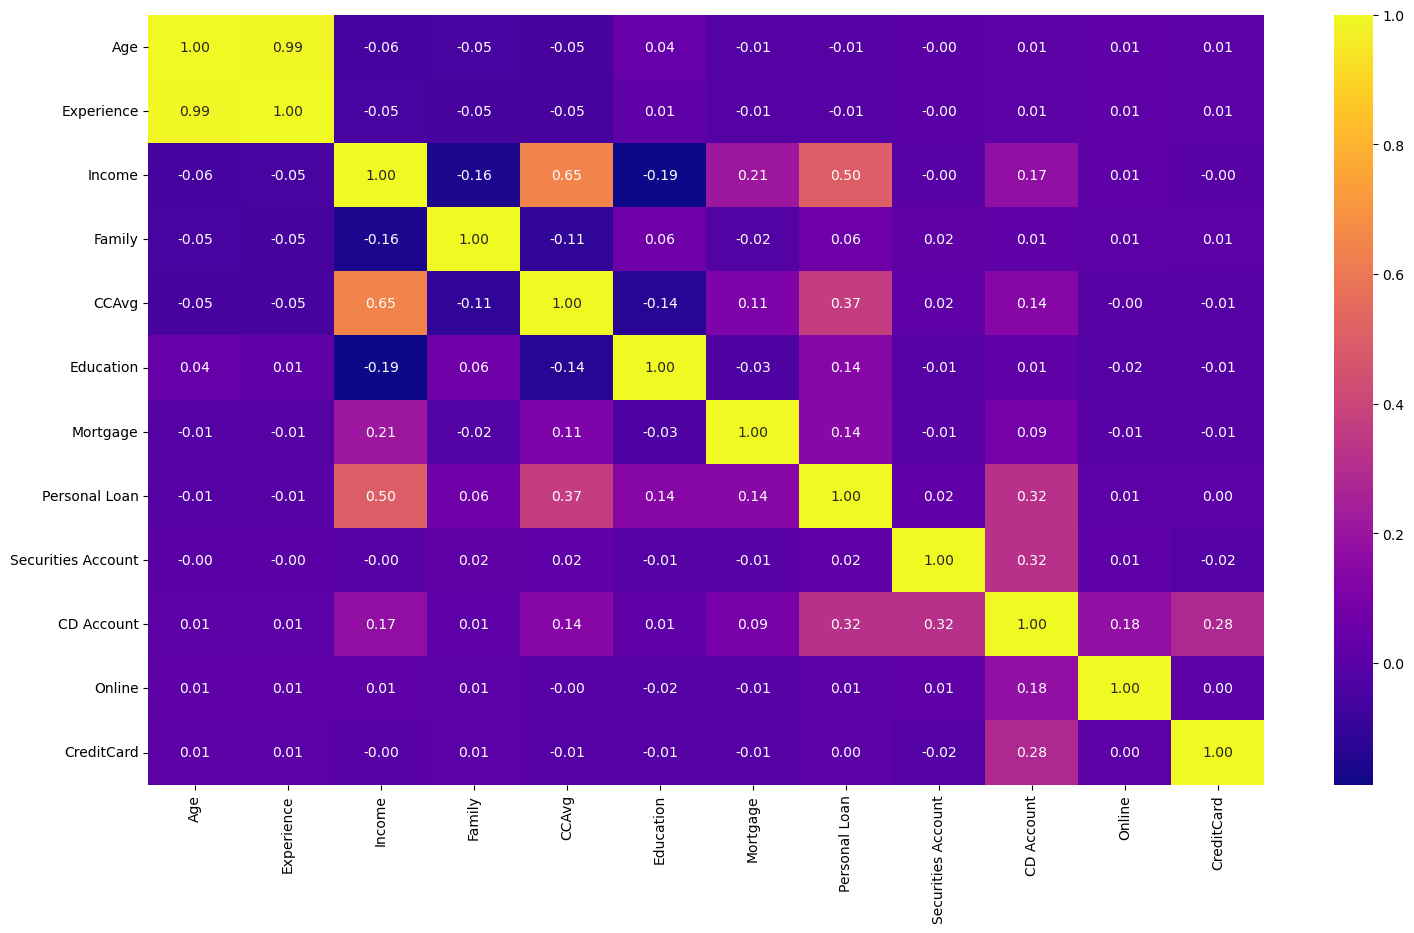

In [40]:
plt.figure(figsize = (18,10))
sns.heatmap(personalloan.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

#### Clustering

- 1.Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'. 

### Modelling

In [51]:
y = personalloan['Personal Loan']
X = personalloan.drop(["Personal Loan"], axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [53]:
accuracies = {}

lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Calculate the accuracy of the model
acc = lr.score(X_test, y_test) * 100

accuracies['Logistic Regression'] = acc
print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 94.05%


C:\Users\syukr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
dts = DecisionTreeClassifier()
dts.fit(X_train, y_train)

# Calculate the accuracy of the model
acc = dts.score(X_test, y_test) * 100

accuracies['Decision Tree Classifier'] = acc
print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 98.05%


In [55]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Calculate the accuracy of the model
acc = rfc.score(X_test, y_test) * 100

accuracies['Random Forest Classifier'] = acc
print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 98.40%


In [56]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

# Calculate the accuracy of the model
acc = knc.score(X_test, y_test) * 100

accuracies['K Neighbors Classifier'] = acc
print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 90.20%


In [57]:
accuracies

{'Logistic Regression': 94.05,
 'Decision Tree Classifier': 98.05,
 'Random Forest Classifier': 98.4,
 'K Neighbors Classifier': 90.2}

#### Choosing Model

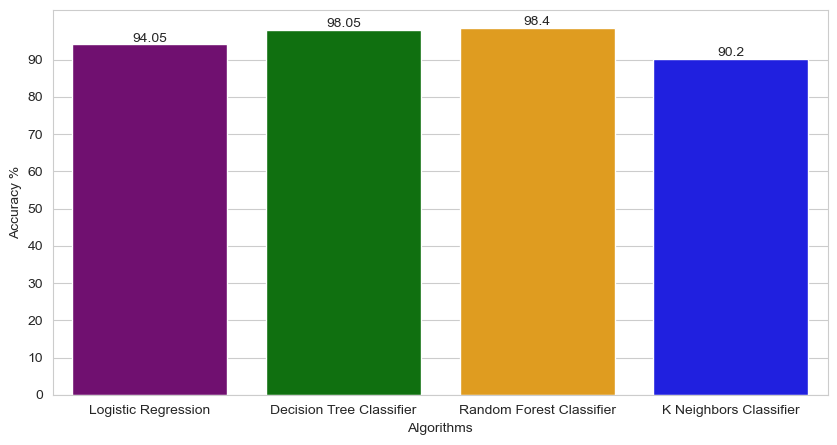

In [58]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    ax.bar_label(i, ) #function2

plt.show()

In [59]:
y_head_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test, y_head_rfc)

<Axes: title={'center': 'Random Forest Classifier Confusion Matrix'}>

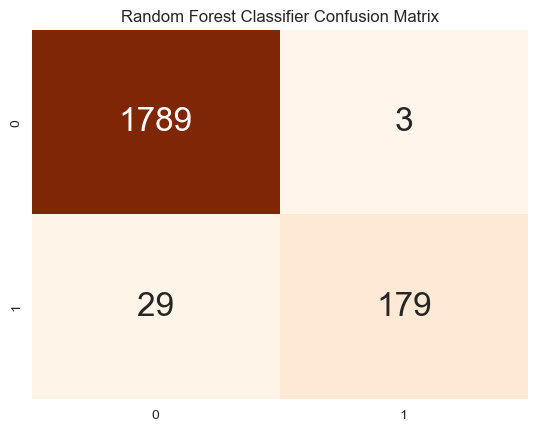

In [60]:
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})


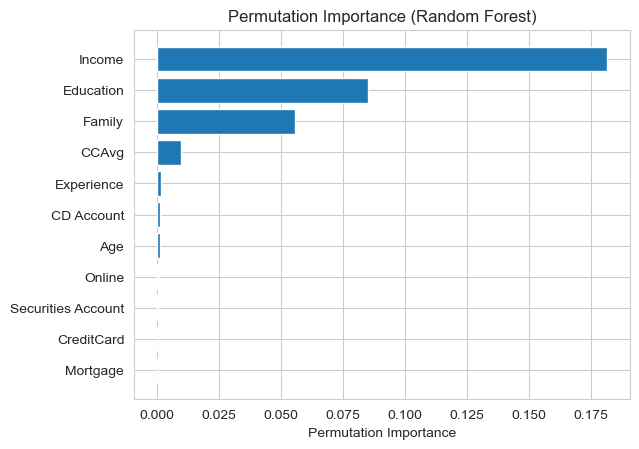

In [61]:
perm_importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)),mean_importance[sorted_idx] , align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

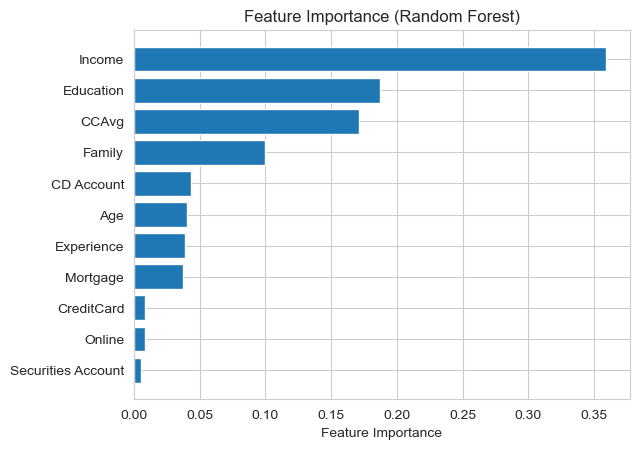

In [62]:
rf_feature_importances = rfc.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

#### Choosing Features

In [63]:
important_features = ['Income', 'Education', 'CCAvg', 'Family']

f = personalloan[important_features] #input
t = personalloan['Personal Loan'] #target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(f, t, test_size=0.2, random_state=0)

In [65]:
personalloan.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [66]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Calculate the accuracy of the model
acc = rfc.score(X_test, y_test) * 100

accuracies['Random Forest Classifier'] = acc
print('Test accuracy: {:.2f}%'.format(acc))

Test accuracy: 99.00%


In [67]:
y_head_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test, y_head_rfc)

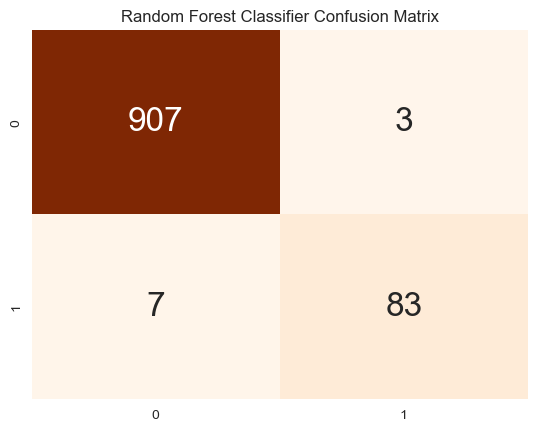

In [68]:
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rfc,annot=True,cmap="Oranges",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()

## Conclution 

Use Random Forest Classfier
Since they have the most accuracy value compare to other 3 models

By using The permutation importance
Imporatant features that are need to include in random forest model is Income, Education, CCAvg, Family.


## Recomendation

The bank need to focus more on income of the customer, education level of the customers , the value customer's spending on credit cards per month and the number of family member that the customer have. 
This foour will determine whether the customer will accept or reject the personal loan offer.
